The famous iris dataset to start with. The reference link for the dataset is given below. https://archive.ics.uci.edu/dataset/53/iris.

In [56]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('iris.data', sep = ',', names = ['sepal_length','sepal_width','petal_length','petal_width','class'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

now let's visualize the plots for further analysis.

__Scatter Plot__

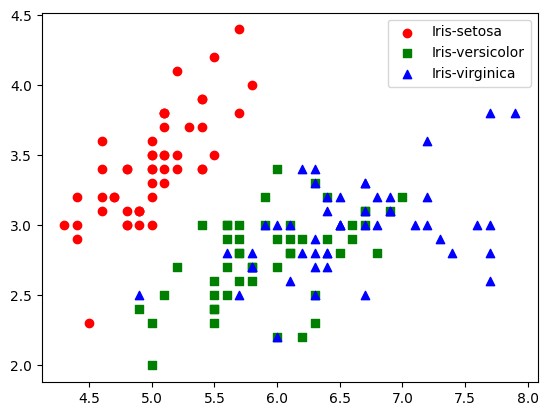

In [55]:
class_groups = data.groupby('class')
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for (class_name, group), color, marker in zip(class_groups, colors, markers):
    plt.scatter(group['sepal_length'], group['sepal_width'], label=class_name, color=color, marker=marker)
plt.legend()
plt.show()

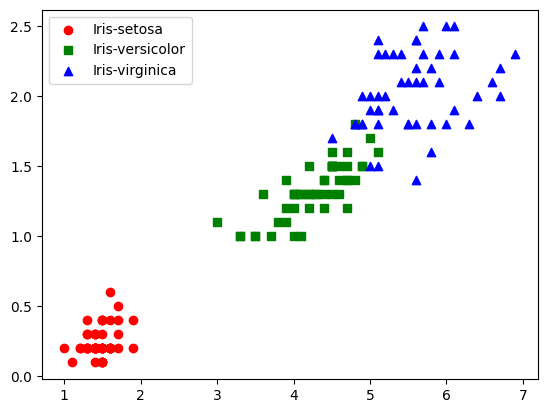

In [61]:
class_groups = data.groupby('class')
colors = ['red', 'green', 'blue']
markers = ['o', 's', '^']
for (class_name, group), color, marker in zip(class_groups, colors, markers):
    plt.scatter(group['petal_length'], group['petal_width'], label=class_name, color=color, marker=marker)
plt.legend()
plt.show()

__Pair Plot__

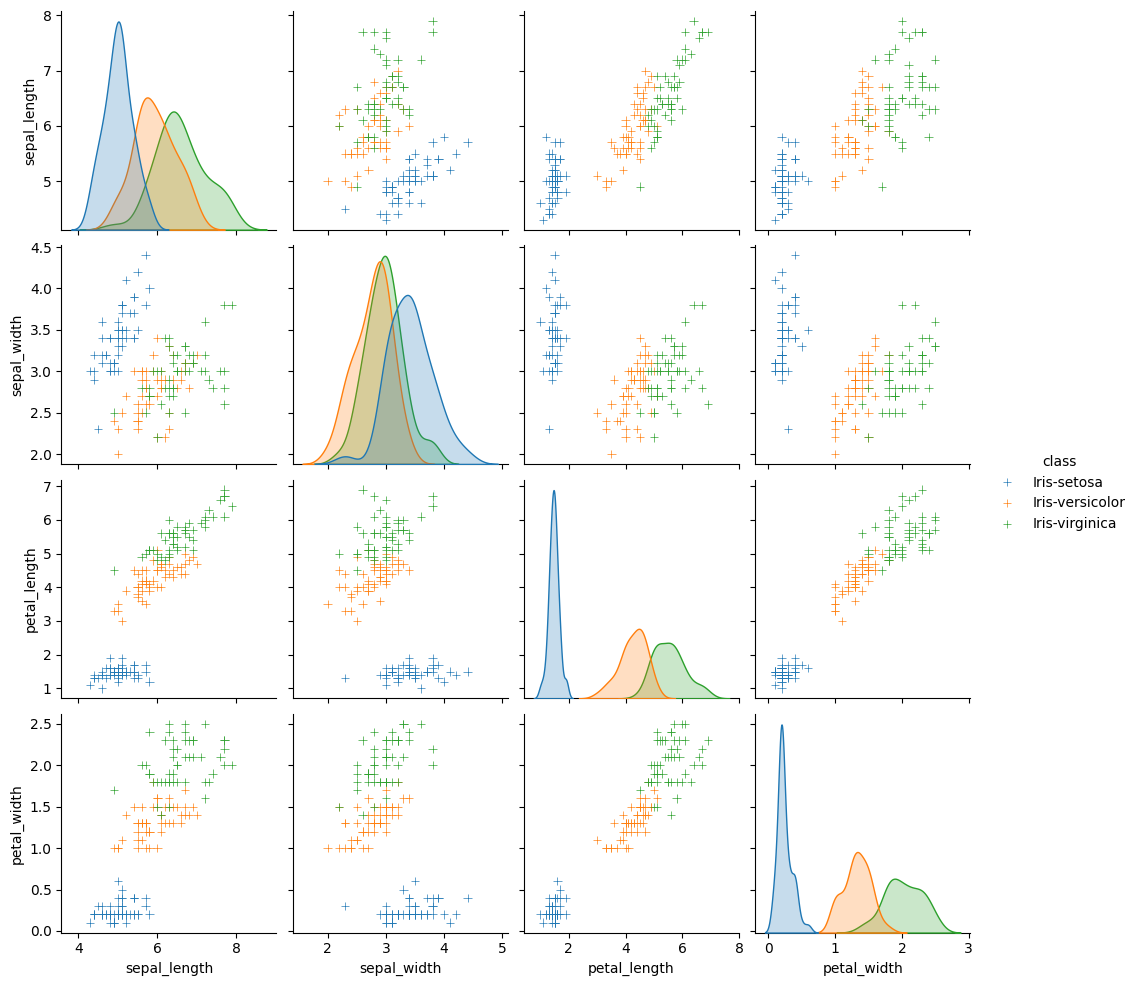

In [8]:
g = sns.pairplot(data, hue = 'class', markers = '+')
plt.show()

* so it's clear from the pair plot that the relationship between pairs of features of a iris-setosa (in blue) is distinctily different from those of the other species.
* There is some overlap in the pairwise relationships of the other two species, iris-versicolor (orange) and iris-virginica (green).

__Histogram__

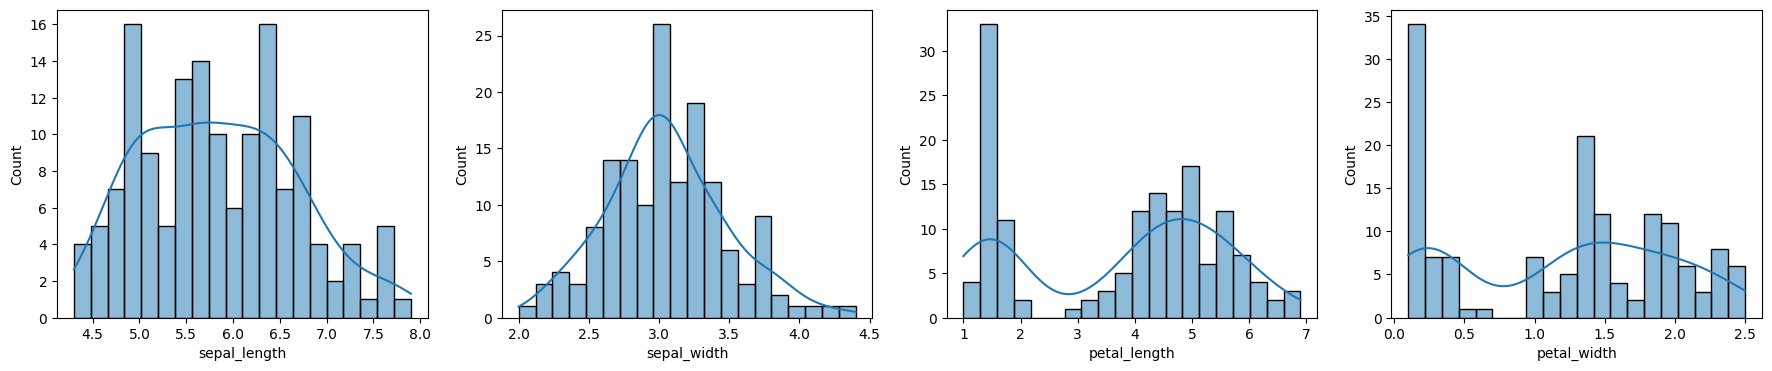

In [9]:
fig, ax = plt.subplots(ncols = 4, figsize = (22, 4))
sns.histplot(x=data['sepal_length'], bins=20, kde=True, ax=ax[0])
sns.histplot(x=data['sepal_width'], bins=20, kde=True, ax=ax[1])
sns.histplot(x=data['petal_length'], bins=20, kde=True, ax=ax[2])
sns.histplot(x=data['petal_width'], bins=20, kde=True, ax=ax[3])
plt.show()

__Box Plot__

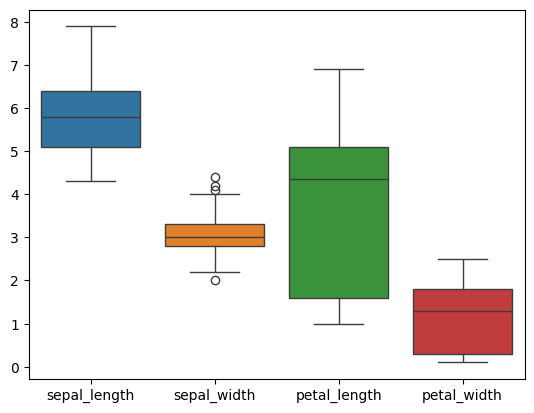

In [10]:
sns.boxplot(data)
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
X = data.drop(columns = ['class'])
y = data['class']

In [17]:
y = le.fit_transform(y)

__Modeling__

__1. Logistic Regression__

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy: 1.0
CV Score: 0.9733333333333334


__2. Decision Tree__

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.9666666666666668


__3. Random Forest__

In [46]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.96


__4. Extra Tree__

In [47]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 1.0
CV Score: 0.9533333333333334
